<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import pandas as pd

In [2]:
digits = load_digits()


In [7]:
digits.data.shape
digits.data
df= pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


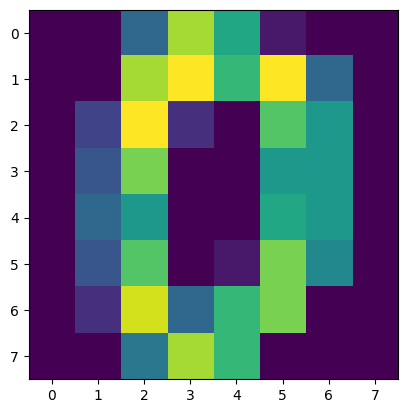

In [8]:
plt.imshow(digits.images[0])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

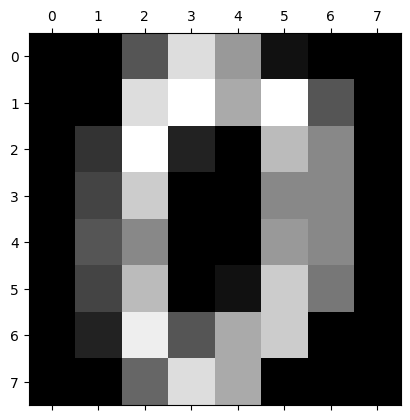

In [11]:
plt.matshow(digits.images[0])
plt.gray()
np.unique(digits.target)

In [13]:
digits.target.shape

(1797,)

In [17]:
x= np.vstack(  [digits.data[digits.target==i] for i in range(10)]  )
y= np.hstack(  [np.full(len(digits.data[digits.target==i]), i) for i in range(10)]  )

In [19]:
x.shape

(1797, 64)

In [21]:
y.shape

(1797,)

In [26]:
digits_final= TSNE( perplexity= 30).fit_transform(x)


In [27]:
digits_final.shape

(1797, 2)

In [29]:
def plot(x, colors):
  fig= plt.figure(figsize=(8,8))
  ax= plt.subplot(aspect=1)
  sc= ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=colors, cmap=plt.cm.get_cmap("jet", 10))
  txts= []
  for i in range(10):
    xtext, ytext= np.median(x[colors==i,  :], axis=0)
    txt= ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
    txts.append(txt)

  return fig, ax, sc, txts

<ipython-input-29-bac45493ed8b>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc= ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=colors, cmap=plt.cm.get_cmap("jet", 10))


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.4964316, 54.60368, '0'),
  Text(5.076145, -12.954291, '1'),
  Text(-28.744091, -29.592909, '2'),
  Text(-37.40587, 2.1679838, '3'),
  Text(42.61181, -12.658683, '4'),
  Text(2.0172431, 19.255848, '5'),
  Text(34.10167, 22.002634, '6'),
  Text(8.014123, -43.231537, '7'),
  Text(-11.453133, -5.9324503, '8'),
  Text(-22.537651, 17.925806, '9')])

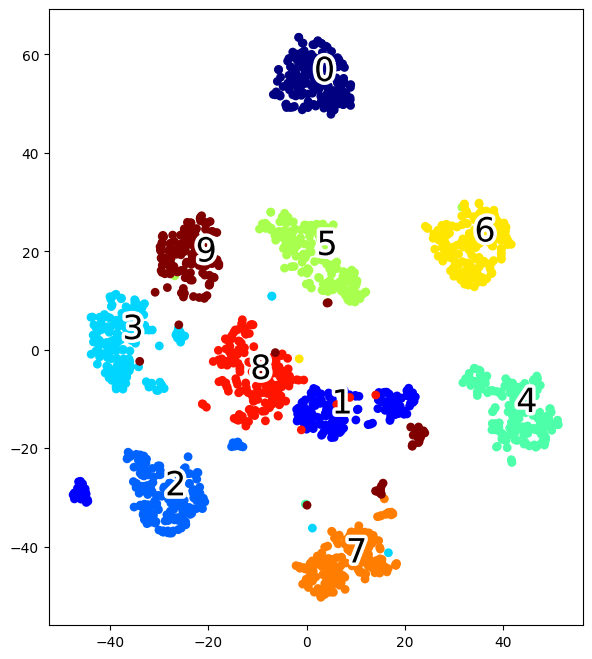

In [31]:
plot(digits_final, y)